In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
try:
    df = pd.read_csv("convex_hull_results.csv")
    distributions = df['tipo'].unique().tolist()
except FileNotFoundError:
    print("ERRO: Arquivo nao encontrado")
    exit()

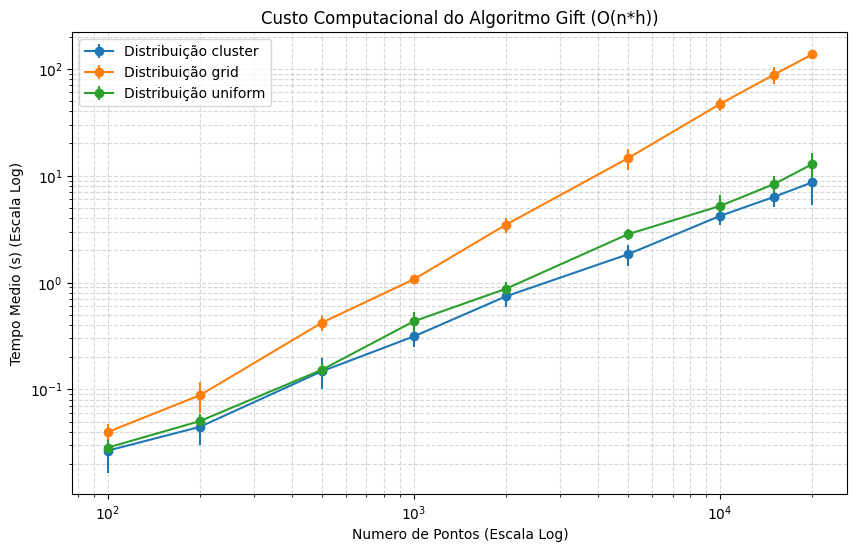

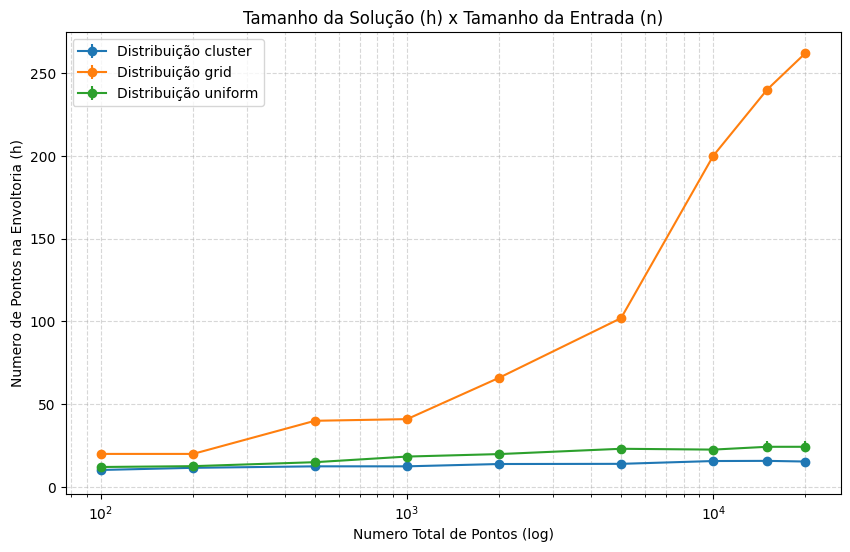

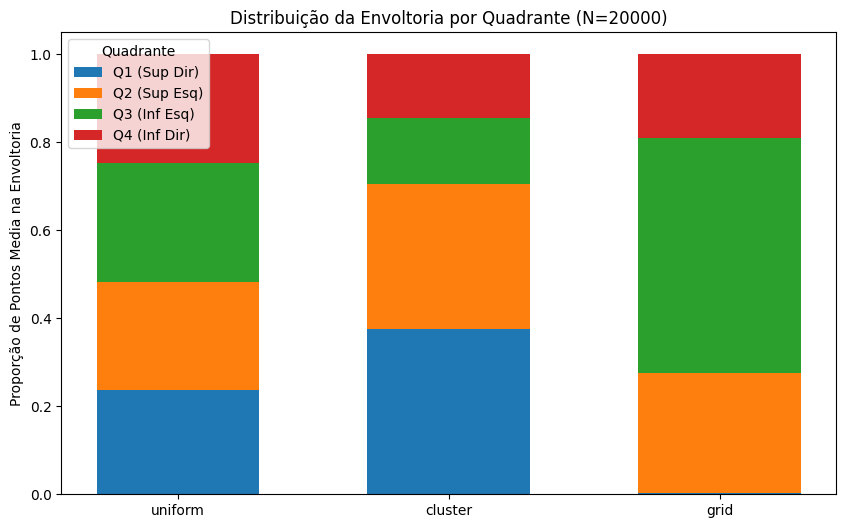

In [7]:
plt.figure(figsize=(10, 6))
for dist, g in df.groupby("tipo"):
    plt.errorbar(g["qnt_points"], g["mean_time"], yerr=g["std_time"], label=f"Distribuição {dist}", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Numero de Pontos (Escala Log)")
plt.ylabel("Tempo Medio (s) (Escala Log)")
plt.title("Custo Computacional do Algoritmo Gift (O(n*h))")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


plt.figure(figsize=(10, 6))
for dist, g in df.groupby("tipo"):
    plt.errorbar(g["qnt_points"], g["mean_hull_points"], yerr=g["std_hull_points"], label=f"Distribuição {dist}", marker='o')
plt.xscale('log')
plt.xlabel("Numero Total de Pontos (log)")
plt.ylabel("Numero de Pontos na Envoltoria (h)")
plt.title("Tamanho da Solução (h) x Tamanho da Entrada (n)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

df_max_n = df[df['qnt_points'] == df['qnt_points'].max()]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6
bottom = np.zeros(len(distributions))
quadrants = ['Q1 (Sup Dir)', 'Q2 (Sup Esq)', 'Q3 (Inf Esq)', 'Q4 (Inf Dir)']

for i, q_label in enumerate(quadrants):
    q_values = [row[f'quadrant_{i+1}_mean'] for index, row in df_max_n.iterrows()]
    ax.bar(distributions, q_values, bar_width, bottom=bottom, label=q_label)
    bottom += q_values

ax.set_ylabel('Proporção de Pontos Media na Envoltoria')
ax.set_title(f'Distribuição da Envoltoria por Quadrante (N={df["qnt_points"].max()})')
ax.legend(title="Quadrante")
plt.show()

 - Diga qual a relação de envoltória convexa com o diagrama de Voronoi

R.: A relação é de uma certa dualidade na geometria, onde basicamente existe um ponto de conexão onde a envoltória convexa é definida pelos pontos do conjunto que geram regiões de Voronoi que se estendem pelo infinito. Na realidade, o que eu entendi, essa dualidade existe muito por conta da exploração de algoritmos que usam a triangulação de delaunay como etapa


- Sobre o crescimento computacional

R.: Foi mantido os mesmos tipos de distribuição igual do último trabalho, o grid, que seria para ter o pior desempenho ou o mais próximo dele, destaca bem a influencia do parâmetro h da complexidade O(N*h), onde o algoritmo é forçado a processar mais vértices de borda, deixando mais lendo como visto no gráfico, sendo que o linear e o cluster são consideravelmente mais rápidas e se comportam de forma parecida


- Sobre a distribuição por quadrante

R.: Depende muito do tipo de distribuição, no linear há um espalhamento mais simétrico, no de cluster há um agrupamento maior nos quadrantes superiores e no grid é o mais irregular, possuindo um enorme dominação na área inferior esquerda